In [3]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
sys.path.append(os.pardir)

from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *

In [4]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

In [5]:
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
# optimizers['RMSprop'] = RMSprop()

In [6]:
networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []

In [7]:
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)

        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)

    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


===========iteration:0===========
SGD:2.4070291281312075
Momentum:2.3704113583324995
AdaGrad:2.151667305269811
Adam:2.1695873421456775
===========iteration:100===========
SGD:1.5785761100542324
Momentum:0.39079393696156633
AdaGrad:0.19254750540515247
Adam:0.3195323960228248
===========iteration:200===========
SGD:0.8044644351099075
Momentum:0.17435010081452834
AdaGrad:0.07857264941395035
Adam:0.11687403523656952
===========iteration:300===========
SGD:0.4837879444111802
Momentum:0.12917533258606656
AdaGrad:0.05287526417676329
Adam:0.10599305781392962
===========iteration:400===========
SGD:0.5533724942141254
Momentum:0.20925645994691422
AdaGrad:0.07633181427807642
Adam:0.1244266510186392
===========iteration:500===========
SGD:0.3716670474727541
Momentum:0.15364132176371936
AdaGrad:0.0685140353790796
Adam:0.11515083622334127
===========iteration:600===========
SGD:0.39903749735449184
Momentum:0.08143483444908062
AdaGrad:0.02873617845120888
Adam:0.04323674839905878
===========iteration:

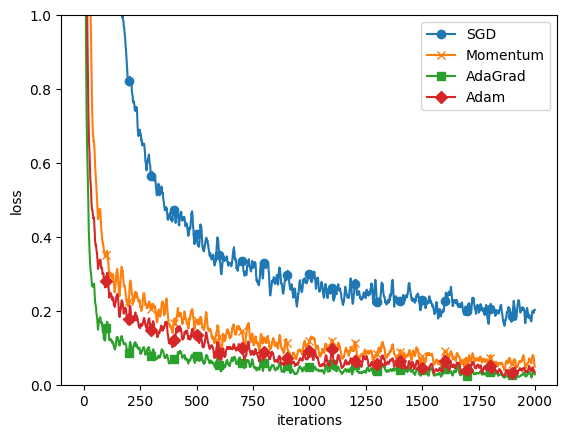

In [8]:
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key],
        markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()